# Ekstraksi Kata Kunci
https://colab.research.google.com/drive/1Kk7ahO-TOxTdz1VfdQkCXhfmRf_2kQYr?usp=sharing

*   **NLTK** berfungsi fungsi untuk melakukan tugas-tugas seperti tokenisasi, stemming, lemmatization, analisis sentimen, pengenalan entitas, dan banyak lagi.
*   **Pandas** menyediakan cara yang efisien untuk mengelola dan menganalisis data tabular seperti dataframe.
*   **CountVectorizer** untuk melakukan ekstraksi fitur dalam bentuk term frequency.
*   **numpy** untuk array dan operasi matematika pada array.
*   **re** Ekspresi reguler digunakan untuk pencocokan pola string dan manipulasi teks.
*   **networkx** adalah pustaka Python yang digunakan untuk analisis jaringan atau graf.







In [3]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import re
import networkx as nx
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
data = pd.read_csv("/content/drive/MyDrive/ppw/tugas/tugas_ppw/suararakyat.csv")
data

,Judul,Isi,Kategori
0,"Hadiri Seminar Nasional, Slamet Ariyadi Gemble...","PAMEKASAN,Suararakyat.id– Slamet Ariyadi luang...",Pendidikan
1,SIAP !! Cerdaskan Siswa-Siswi SD Negeri Giliba...,Mahasiswa UTM adakan Gerakan Memasyarakatkan M...,Pendidikan
2,Direktur Pasca Sarjana IAIN Madura Ajak Mahasi...,"PAMEKASAN,Suararakyat.id– Kegiatan Kuliah Peng...",Pendidikan
3,MK Tolak Gugatan Usia Minimal Capres-Cawapres ...,"JAKARTA, Suararakyat.id–Mahkamah Konstitusi (M...",Politik
4,Sukes Gelar Festival Nasyid Islami :Al-Amin Al...,"SUMENEP,Suararakyat.id– Dalam Rangka Memeriahk...",Pendidikan
...,...,...,...
140,MK Tolak Gugatan Usia Minimal Capres-Cawapres ...,"JAKARTA, Suararakyat.id–Mahkamah Konstitusi (M...",Politik
141,BEM SI Akan Gelar Aksi Demo Besar-Besaran pada...,"JAKARTA, Suararakyat.id– Badan Eksekutif Mahas...",Politik
142,Sportif Cup 2022 : Tim Voli Remaja BPRS siap T...,"SUMENEP,Suararakyat.id– Tim kuat Remaja BPRS a...",Sport
143,"Bupati Sumenep Buka JJC, Minta Guru Memberikan...","SUMENEP,Suararakyat.id– Dinas Pendidikan (Disd...",Pendidikan


In [5]:
data1=data.head(1)
data1

,Judul,Isi,Kategori
0,"Hadiri Seminar Nasional, Slamet Ariyadi Gemble...","PAMEKASAN,Suararakyat.id– Slamet Ariyadi luang...",Pendidikan


## Preprocessing



re.sub ['^a-zA-Z\s'] ini akan menghapus semua karakter non-abjad (tidak termasuk spasi) dari teks masukan.

In [6]:
#Remove Puncutuation
clean_symbol = re.compile('[^a-zA-Z\s]')
def clean_punct(text):
    text = clean_symbol.sub(' ', text).lower()
    return text
# Buat kolom tambahan untuk data description yang telah diremovepunctuation
preprocessing = data1['Isi'].apply(clean_punct)
clean=pd.DataFrame(preprocessing)
clean

,Isi
0,pamekasan suararakyat id slamet ariyadi luang...


*   Dilakukan proses tokenisasi setiap kalimat.
*   Hasil tokenisasi dilakukan penghapusan kata yang tidak penting



In [7]:
# Unduh stop words dari nltk
stop_words = set(stopwords.words('indonesian'))
# Fungsi untuk menghapus stop words dari setiap kalimat
def remove_stopwords(sentence):
    words = word_tokenize(sentence)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Terapkan fungsi pada kolom 'Kalimat' dalam DataFrame
stopword = clean['Isi'].apply(remove_stopwords)
df=pd.DataFrame(stopword)
df

,Isi
0,pamekasan suararakyat id slamet ariyadi luangk...


## Term Frequency

Data yang telah dilakukan preprocssing akan masuk ke dalam proses term frequency, dimana setiap kata dihitung jumlah kemunculannya didalam dokumen

In [8]:
# Menghitung matriks co-occurrence dengan CountVectorizer
vectorizer = CountVectorizer()
co_occurrence_matrix = vectorizer.fit_transform(df['Isi']).T * vectorizer.fit_transform(df['Isi'])

# Membuat DataFrame dari matriks co-occurrence
df_co_occurrence = pd.DataFrame(co_occurrence_matrix.toarray(), columns=vectorizer.get_feature_names_out(),index=vectorizer.get_feature_names_out())
df_co_occurrence

,acara,acuh,adaptif,anti,ariyadi,asing,audiens,auditorium,badan,bangsa,...,the,tujuan,tunggulah,tutupnya,unira,universitas,warga,wib,yasin,yulianto
acara,25,10,5,10,15,5,5,5,5,10,...,5,10,5,5,15,40,5,5,15,10
acuh,10,4,2,4,6,2,2,2,2,4,...,2,4,2,2,6,16,2,2,6,4
adaptif,5,2,1,2,3,1,1,1,1,2,...,1,2,1,1,3,8,1,1,3,2
anti,10,4,2,4,6,2,2,2,2,4,...,2,4,2,2,6,16,2,2,6,4
ariyadi,15,6,3,6,9,3,3,3,3,6,...,3,6,3,3,9,24,3,3,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
universitas,40,16,8,16,24,8,8,8,8,16,...,8,16,8,8,24,64,8,8,24,16
warga,5,2,1,2,3,1,1,1,1,2,...,1,2,1,1,3,8,1,1,3,2
wib,5,2,1,2,3,1,1,1,1,2,...,1,2,1,1,3,8,1,1,3,2
yasin,15,6,3,6,9,3,3,3,3,6,...,3,6,3,3,9,24,3,3,9,6


Pembentukan Graph : Setiap kata yang memiliki hubungan dengan kata lain dan nilai Term frequency lebih dari 5 akan dibentuk node yang saling terhubung

In [9]:
G = nx.DiGraph()
for idx, row in df_co_occurrence.iterrows():
    for col in df_co_occurrence.columns:
        weight = df_co_occurrence.loc[idx, col]
        if weight > 60 and idx != col:
            G.add_edge(idx, col, weight=weight)

## Pagerank
**PageRank** adalah algoritma yang digunakan oleh mesin pencari, terutama oleh Google, untuk menilai dan memberikan peringkat pada halaman web dalam hasil pencarian. Algoritma ini dikembangkan oleh Larry Page dan Sergey Brin, pendiri Google, dan dinamakan setelah nama Larry Page. PageRank mengukur otoritas atau kepentingan suatu halaman web berdasarkan seberapa banyak halaman lain yang mengaitkan ke halaman tersebut dan seberapa pentingnya halaman-halaman yang memberikan tautan tersebut.

Dalam kasus kali ini PageRank mengukur otoritas atau kepentingan suatu kata berdasarkan seberapa banyak kata lain yang mengaitkan ke kata tersebut dan seberapa pentingnya kata-kata yang memberikan tautan tersebut.

### **Algoritma Pagerank**


1.   Identifikasi kata-kata yang akan dievaluasi.
2.   Buat graph antar kata dengan tautan antar kata.
3.   Inisialisasi pagerank, Setiap halaman web diberikan nilai awal PageRank yang sama.
4.   Kemudian lakukan iterasi perhitungan pagerank.

**Rumus Pagerank :**

$\text{PR(A)}=\frac{d}{N} + \left( 1 - d\right)\left( \sum_{}^{} \frac{\text{Rank(i)}}{Outlink(i)} \right)$



*   PR(i) adalah PageRank dari kata A
*   d adalah faktor damping (biasanya 0.85 untuk Google PageRank)
*   N adalah jumlah total kata


### **Contoh manual Pagerank**

https://docs.google.com/spreadsheets/d/1kGmqOQ2q3RcFOXFjrEiYRdj3qA8L7OLl/edit?usp=sharing&ouid=102642560487377842579&rtpof=true&sd=true


Berikut adalah gambar graph yang dihasilkan dari hubungan antar kata yang memiliki nilai TF lebih dari 60

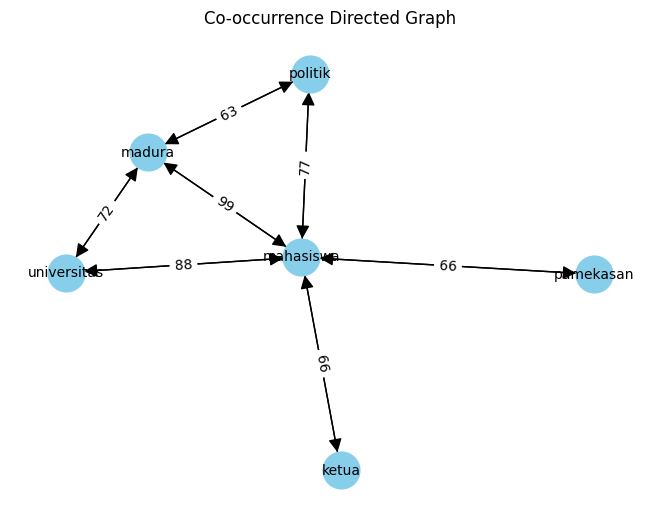

In [10]:
# Menampilkan graf
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Co-occurrence Directed Graph")
plt.show()

In [15]:
pr = nx.pagerank(G)
sorted_d = sorted(pr.items(), key=lambda x: x[1], reverse=True)[:3]
sorted_d

[('mahasiswa', 0.35988942349958125),
 ('madura', 0.2084561015076507),
 ('universitas', 0.14749878729546592)]